Initializing the notebook:

In [1]:
import os
import numpy as np
from functions import *
import matplotlib.pyplot as plt

# Get the directory where the current script is located
script_directory = os.getcwd()

# Change the current working directory to the script's directory
os.chdir(script_directory)

# Now the CWD is the same as the script's directory
print("New Current Working Directory:", os.getcwd())

New Current Working Directory: /Users/behradmoadeli/Documents/PhD/behrads_papers/reports


# System Model

Initially, only the equation for one state (temperature or concentration) will be considered. For simplicity, the domain will be $[0,1]$, with Danckwerts boundary conditions:

$$\left\{\begin{array}{l} \dot{x} = D\partial_{\zeta\zeta} x -v\partial_{\zeta} x +kx\\
D\partial_\zeta x(0,t)-vx(0,t)=-v[Rx(1,t-\tau)+(1-R)u(t-\tau_I)] \\
\partial_\zeta x(1,t)=0 \\
y(t)=x(1,t-\tau_O)
  \end{array}\right. $$

This model considers that the input is applied in the reactor's entrance, which is mixed with the recycle from the outlet. Input, output, and state delays are considered and represented by $\tau_I,\tau_O$, and $\tau$, respectively. 

## Eigenvalue Analysis

The eigenvalue problem, defined as $A\Phi(\zeta,\lambda)=\lambda\Phi(\zeta,\lambda)$, will result in the following system of equation for this system:

$$\left\{\begin{array}{l} \lambda\phi = D\partial_{\zeta\zeta} \phi -v\partial_{\zeta} \phi +k\phi\\
\lambda\psi=\dfrac{1}{\tau}\partial_{\zeta}\psi\\
D\partial_\zeta \phi(0)-v\phi(0)=-Rv\psi(0) \\
\partial_\zeta \phi(1)=0 \\
\psi(1)=\phi(1)\\
  \end{array}\right. $$

where $\Phi=[\phi,\,\psi]^T$, with $\phi$ as the state eigenfunction and $\psi$ as the eigenfunction related to the delay. By defining $X=[\phi,\, \partial_{\zeta}\phi,\,\psi]^T$, the following system of ODEs is obtained:

$$
\left\{\begin{array}{l}\partial_{\zeta}X=\begin{bmatrix} 0 & 1 & 0\\ \dfrac{\lambda-k}{D} & \dfrac{v}{D} & 0\\0 & 0 & \tau\lambda\end{bmatrix}X=ΛX \\
DX_2(0)-vX_1(0)=-RvX_3(0) \\
X_2(1)=0 \\
X_3(1)=X_1(1)\\ \end{array}\right.
$$

## Characteristic Equation

This is a system of first order ODE's, and the solution to such systems is given by:

$$ X(\zeta, \lambda) = e^{\Lambda \zeta} X (\zeta=0, \lambda) \\ \overset{\zeta = 1}{\Rightarrow} X(1, \lambda) = e^{\Lambda} X (\zeta=0) $$

Now, let's assume:

$$ e^{\Lambda} = Q(\lambda) = \begin{bmatrix} 
        q_{1} & q_{2} & q_{3} \\ q_{4} & q_{5} & q_{6} \\ q_{7} & q_{8} & q_{9}
    \end{bmatrix} $$


Thus, we may write:

$$\left\{\begin{array}{l}
X_1(1) = q_1 X_1(0) + q_2 X_2(0) + q_3 X_3(0) \\
X_2(1) = q_4 X_1(0) + q_5 X_2(0) + q_6 X_3(0) \\
X_3(1) = q_7 X_1(0) + q_8 X_2(0) + q_9 X_3(0)
\end{array}\right.$$

Now, we may go ahead and put the above expressions into boundary conditions to get the following:

$$\left\{\begin{array}{l}
Dx_2-vx_1=-Rvx_3 \\
q_4 x_1 + q_5 x_2 + q_6 x_3 = 0 \\
q_7 x_1 + q_8 x_2 + q_9 x_3 = q_1 x_1 + q_2 x_2 + q_3 x_3
\end{array}\right. \Rightarrow \left\{\begin{array}{l}
-vx_1 + Dx_2 + Rvx_3 = 0 \\
q_4 x_1 + q_5 x_2 + q_6 x_3 = 0 \\
(q_1 - q_7) x_1 + (q_2 - q_8) x_2 + (q_3 - q_9) x_3 = 0
\end{array}\right.$$


where $x_i$ is the same as $X_i(0)$.

For this particular case, we know that:

$$ q_{3} = q_{6} = q_{7} = q_{8} = 0 $$

This will further simplify the above system of equions into the following system:

$$\left\{\begin{array}{l}
-vx_1 + Dx_2 + Rvx_3 = 0 \\
q_4 x_1 + q_5 x_2 = 0 \\
q_1 x_1 + q_2 x_2 - q_9 x_3 = 0
\end{array}\right.$$

This is a $3 \times 3$ system of algebraic equations in the form of $\bar{A} \bar{x} = 0 $, with:

$$ \bar{A} = \begin{bmatrix}
-v & D & Rv \\
q_4 & q_5 & 0 \\
q_1 & q_2 & -q_9
\end{bmatrix}; \quad \bar{x} = \begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix} $$

 For such a system to have non-trivial solution (i.e. $\bar{x} \neq 0$), the dimension of the nullspace of the coefficients matrix $\bar{A}$ needs to be non-zero. This will happen if and only if the coefficients matrix $\bar{A}$ is rank-deficient. One way to make sure matrix $ \bar{A} $ is not full-rank, is to set its determinant equal to zero. Doing so and further simplifying the result will give the characteristic equation as following:
$$
f(\lambda) = e^{(\lambda \tau+\frac{v}{2D})}
\left[
    \frac{(v^2+2D^2)}{\sqrt{v^2-4D\left(k-\lambda\right)}}\sinh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})} + v \cosh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})}
\right]
- vRe^{(\frac{v}{D})}
= 0
$$

To ease numerical calculation, we use the limit of the above equation where the denominator of the first term approaches zero. The limit is obtained as follows:

$$
\lim_{p(\lambda) \to 0} f(\lambda) = ... 
= e^{(\lambda \tau+\frac{v}{2D})}
\left[
    \frac{v^2}{2D} + v + D
\right]
- vRe^{(\frac{v}{D})}

$$

where $ p(\lambda) \equiv v^2-4D\left(k-\lambda\right) $.

## Adjoint Operator

Prior to solving the obtained equation for eigenvalues, we first need to see whether or not the operator $\hat{A}$ is self-adjoint. This will be done by calculating ${\hat{A}}^{*}$ and then checking if $\hat{A} = {\hat{A}}^{*}$:

$$
\begin{align*}
    &\begin{cases}
        &\hat{A} (.) =
        &\begin{bmatrix}
            D\partial_{\zeta\zeta} (.) -v\partial_{\zeta} (.) +k(.) & 0 \\
            0 & \dfrac{1}{\tau}\partial_{\zeta} (.)
        \end{bmatrix} \\
        \, \\
        &B.C. \quad : \quad &\begin{cases}
            D\partial_\zeta \phi(0)-v\phi(0)=-Rv\psi(0) \\
            \partial_\zeta \phi(1)=0 \\
            \psi(1)=\phi(1)
        \end{cases}
    \end{cases}\\
    \, \\
    <\hat{A} \Phi, \Psi> = <\Phi, {\hat{A}}^{*} \Psi> \Rightarrow
    &\begin{cases}
        &{\hat{A}}^{*} (.) =
        &\begin{bmatrix}
            D\partial_{\zeta\zeta} (.) +v\partial_{\zeta} (.) +k(.) & 0\\
            0 & -\dfrac{1}{\tau}\partial_{\zeta} (.)
        \end{bmatrix} \\
        \, \\
        &B.C. \quad : \quad &\begin{cases}
            D\partial_\zeta \phi^{*}(1)+v\phi^{*}(1)=Rv\psi^{*}(1) \\
            \partial_\zeta \phi^{*}(0)=0 \\
            \psi^{*}(0)=\phi^{*}(0)
        \end{cases}
    \end{cases}
    \Rightarrow \hat{A} \neq {\hat{A}}^{*}
\end{align*}
$$

Therefore, operator $\hat{A}$ is not self adjoint. However, we need to make sure that $\hat{A}$ and $\hat{A}^*$ share the same spectrum (i.e. eigenvalue distribution). Hence, we need to obtain the characteristic equation for $\hat{A}^*$, just as we did for $\hat{A}$.

### Adjoint Eigenvalue Analysis

The eigenvalue problem, defined as $\hat{A}^*\Phi(\zeta,\lambda)=\lambda\Phi(\zeta,\lambda)$, will result in the following system of equation for this system:

$$\left\{\begin{array}{l} \lambda\phi = D\partial_{\zeta\zeta} \phi +v\partial_{\zeta} \phi +k\phi\\
\lambda\psi=-\dfrac{1}{\tau}\partial_{\zeta}\psi\\
D\partial_\zeta \phi(1)+v\phi(1)=Rv\psi(1) \\
\partial_\zeta \phi(0)=0 \\
\psi(0)=\phi(0)\\
  \end{array}\right. $$

where $\Phi=[\phi,\,\psi]^T$, with $\phi$ as the state eigenfunction and $\psi$ as the eigenfunction related to the delay. By defining $X=[\phi,\, \partial_{\zeta}\phi,\,\psi]^T$, the following system of ODEs is obtained:

$$
\left\{\begin{array}{l}\partial_{\zeta}X=\begin{bmatrix} 0 & 1 & 0\\ \dfrac{\lambda-k}{D} & \dfrac{-v}{D} & 0\\0 & 0 & -\tau\lambda\end{bmatrix}X=ΛX \\
DX_2(1)+vX_1(1)=RvX_3(1) \\
X_2(0)=0 \\
X_3(0)=X_1(0)\\ \end{array}\right.
$$

### Adjoint Characteristic Equation

This is a system of first order ODE's, and the solution to such systems is given by:

$$ X(\zeta, \lambda) = e^{\Lambda (\zeta-\zeta=1)} X (\zeta=1, \lambda) \\ \overset{\zeta = 0}{\Rightarrow} X(0, \lambda) = e^{-\Lambda} X (\zeta=1) $$

Now, let's assume:

$$ e^{-\Lambda} = Q(\lambda) = \begin{bmatrix} 
        q_{1} & q_{2} & q_{3} \\ q_{4} & q_{5} & q_{6} \\ q_{7} & q_{8} & q_{9}
    \end{bmatrix} $$


Thus, we may write:

$$\left\{\begin{array}{l}
X_1(0) = q_1 X_1(1) + q_2 X_2(1) + q_3 X_3(1) \\
X_2(0) = q_4 X_1(1) + q_5 X_2(1) + q_6 X_3(1) \\
X_3(0) = q_7 X_1(1) + q_8 X_2(1) + q_9 X_3(1)
\end{array}\right.$$

Now, we may go ahead and put the above expressions into boundary conditions to get the following:

$$\left\{\begin{array}{l}
Dx_2+vx_1=Rvx_3 \\
q_4 x_1 + q_5 x_2 + q_6 x_3 = 0 \\
q_7 x_1 + q_8 x_2 + q_9 x_3 = q_1 x_1 + q_2 x_2 + q_3 x_3
\end{array}\right. \Rightarrow \left\{\begin{array}{l}
vx_1 + Dx_2 - Rvx_3 = 0 \\
q_4 x_1 + q_5 x_2 + q_6 x_3 = 0 \\
(q_1 - q_7) x_1 + (q_2 - q_8) x_2 + (q_3 - q_9) x_3 = 0
\end{array}\right.$$


where $x_i$ is the same as $X_i(1)$.

For this particular case, we know that:

$$ q_{3} = q_{6} = q_{7} = q_{8} = 0 $$

This will further simplify the above system of equions into the following system:

$$\left\{\begin{array}{l}
vx_1 + Dx_2 + Rvx_3 = 0 \\
q_4 x_1 + q_5 x_2 = 0 \\
q_1 x_1 + q_2 x_2 - q_9 x_3 = 0
\end{array}\right.$$

This is a $3 \times 3$ system of algebraic equations in the form of $\bar{A} \bar{x} = 0 $, with:

$$ \bar{A} = \begin{bmatrix}
-v & D & Rv \\
q_4 & q_5 & 0 \\
q_1 & q_2 & -q_9
\end{bmatrix}; \quad \bar{x} = \begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix} $$

 For such a system to have non-trivial solution (i.e. $\bar{x} \neq 0$), the dimension of the nullspace of the coefficients matrix $\bar{A}$ needs to be non-zero. This will happen if and only if the coefficients matrix $\bar{A}$ is rank-deficient. One way to make sure matrix $ \bar{A} $ is not full-rank, is to set its determinant equal to zero. Doing so and further simplifying the result will give the characteristic equation as following:
$$
f(\lambda) = e^{(\lambda \tau+\frac{v}{2D})}
\left[
    \frac{(v^2+2D^2)}{\sqrt{v^2-4D\left(k-\lambda\right)}}\sinh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})} + v \cosh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})}
\right]
- vRe^{(\frac{v}{D})}
= 0
$$

Which is exactly the same as the previous characteristic equation. We may now move forward and calculate the eigenvalues of the system for a given set of parameters.

## Numerical Solution

Initializing system parameters:

In [2]:
default_pars = obtain_default_pars('pars_list.csv')
display(default_pars)

{'k': 1.5, 'D': 0.05, 'v': 1, 'tau': 0.8, 'R': 0.6, 'label': 'default'}

### Solving Characteristic Equation for $\hat{A}$

Searching `guess` range to obtain eigenvalues distribution:

In [3]:
path = "CSV/default.csv"

if not os.path.exists(path):
    guess = {
        'guess_range_real':[-150,50,50],
        'guess_range_imag':[0,100,20]
    }
    save_dataframe_to_csv(*find_eig(default_pars, **guess, round_sig_digits=5, tol_is_sol=1e-7, max_iter=200), 'CSV')
else:
    print("Solution has already been saved in the appropriate location.")

Solution has already been saved in the appropriate location.


Plotting the obtained eigenvalue distribution:

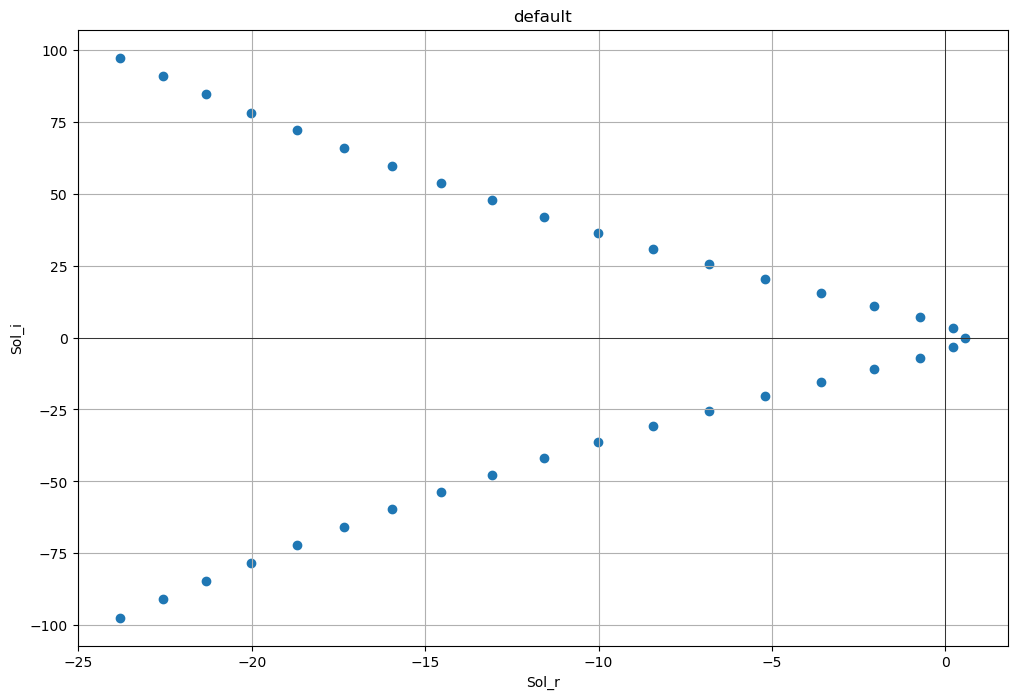

{'par': {'k': 1.5; 'D': 0.05; 'v': 1; 'tau': 0.8; 'R': 0.6; 'label': 'default'}; 'guess_range': ([-150; 50; 50]; [0; 100; 20]); 'tols': (1e-09; 1e-07; 5)}


,Sol_r,Sol_i,Guess,g(x),g*(x),ier,msg,infodict,instances
0,0.57438,0.0000,[-150. 0.],4.064244e-12,3.003729e-11,1,The solution converged.,"{'nfev': 254, 'fjac': array([[-0.99998164, -0....",21
1,0.22125,-3.3599,[ 0.22125264 -3.35991407],1.060539e-15,2.598965e-15,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.99993486, -0.01...",22
2,0.22125,3.3599,[-6. 0.],7.980614e-12,2.234843e-11,1,The solution converged.,"{'nfev': 61, 'fjac': array([[ 0.98657574, 0.1...",22
3,-0.72849,7.0043,[-90. 0.],9.131048e-11,3.277113e-10,1,The solution converged.,"{'nfev': 160, 'fjac': array([[-0.99732455, -0....",23
4,-0.72849,-7.0043,[-0.72848856 -7.0042923 ],6.684428e-16,1.790181e-15,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.99945529, 0.03...",23
5,-2.05770,11.0590,[-114. 0.],2.807344e-09,2.246473e-08,1,The solution converged.,"{'nfev': 183, 'fjac': array([[-0.9943549 , -0....",22
6,-2.05770,-11.0590,[ -2.05768553 -11.05855231],2.101374e-15,1.486373e-14,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.99433932, 0.10...",22
7,-3.58360,15.5170,[-42. 0.],8.290971e-11,1.887277e-09,1,The solution converged.,"{'nfev': 100, 'fjac': array([[-0.86673813, -0....",27
8,-3.58360,-15.5170,[ -3.58362211 -15.5173744 ],2.074068e-15,5.818755e-14,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.98383325, 0.17...",27
9,-5.19190,20.3250,[-86. 0.],2.780473e-10,2.004791e-08,1,The solution converged.,"{'nfev': 163, 'fjac': array([[-0.99116924, -0....",30


In [4]:
df, label, metadata = plot_single_df(
        path, filter=True,
        real_lower_bound=-25, real_upper_bound=10, imag_lower_bound=-100, imag_upper_bound=100
)
n_lambdas = 12
display(df.head(n_lambdas))

## Obtaining Eigenfunctions

Having obtained the eigenvalues of the open-loop system, we may go ahead and find the eigenfunction corresponding to each eigenvalue. To do so, we plug in the eigenvalue into the eigenvalue problem and form a system of ODE's. Solving the resulting system will give the eigenvalue's corresponding eigenfunction. We start by 3 eigenvalues with largest real parts. These values are stored in `lambdas` as follows:

In [5]:
lambdas = []
for index, row in df.head(n_lambdas).iterrows():
    l = complex(row['Sol_r'], row['Sol_i'])
    print(f'lambda_{index+1} = {l}')
    lambdas.append(l)

lambda_1 = (0.57438+0j)
lambda_2 = (0.22125-3.3599j)
lambda_3 = (0.22125+3.3599j)
lambda_4 = (-0.72849+7.0043j)
lambda_5 = (-0.72849-7.0043j)
lambda_6 = (-2.0577+11.059j)
lambda_7 = (-2.0577-11.059j)
lambda_8 = (-3.5836+15.517j)
lambda_9 = (-3.5836-15.517j)
lambda_10 = (-5.1919+20.325j)
lambda_11 = (-5.1919-20.325j)
lambda_12 = (-6.8196+25.42j)


The problem of finding the eigenfunctions is now reduced to solving a system of linear ODEs  for each $\lambda_{i}$, containing a first order and a second order ODE.

$$\left\{\begin{array}{l}
D\partial_{\zeta\zeta} \phi &-v\partial_{\zeta} \phi &+(k-\lambda) \phi &= 0 &\\
\, \\
&\dfrac{1}{\tau}\partial_{\zeta}\psi &- \lambda\psi &= 0 &\\
\end{array}\right. $$

It can be proven that the resulting characteristic equation for the second order ODE will always have 2 distinct roots as long as $\lambda \neq -k$. Therefore, the general form of the required eigenfunction looks like the following:

$$\left\{\begin{array}{l}
\phi_{i}(\zeta) =& a e^{r_{1}\zeta} + b e^{r_{2}\zeta} &\\
\psi_{i}(\zeta) =& c e^{\tau \lambda \zeta} &\\
\end{array}\right. $$

where $a, b,$ and $c$ are unknown coefficients that can be determined by applying boundary conditions. Also, $r_{1,2}$, the roots of the second order ODE, shall obtained as follows:

$$
{r_{1,2}}_i = \frac{v \pm \sqrt{v^2+4D\left(\lambda_i-k\right)}}{2D} \quad \text{for } i=1,2,3,\dots
$$

Applying the following boundary conditions:

$$\left\{\begin{array}{l}
D \partial_{\zeta} \phi (0) - v \phi (0) &=& -R v \psi (0) \\
\, \\
\partial_{\zeta} \phi (1) &=& 0 \\
\, \\
\phi(1) &=& \psi(1) \\
\end{array}\right. $$

will result in the following system of linear algebraic equations that can give us the coefficients $a, b,$ and $c$:

$$\left\{\begin{array}{l}
D ( a r_1 + b r_2) - v (a + b) &=& -Rvc \\
\, \\
a r_1 e^{r_1} + b r_2 e^{r_2} &=& 0 \\
\, \\
a e^{r_1} + b e^{r_2} &=& c e^{\tau \lambda} \\
\end{array}\right.$$

The above system of algebraic equation is rank deficient, resulting in one of the coefficient to be equal to $\frac{0}{0}$. Here, we decided to keep `b` and obtain `a`, `c` as functions of `b`:

$$\begin{align*}
\begin{cases}
a = -\frac{r_2 e^{r_2}}{r_1 e^{r_1}}b \\
\, \\
c = b (1-\frac{r_2}{r_1}) e^{r_2 - \tau \lambda}\\
\end{cases}
\end{align*}
$$

The third equation will be redundant, as shown below:

$$\begin{align*}
b \times \Bigl(g(\lambda_i)\Bigr) = 0
\end{align*}
$$

where $g(\lambda_i)$ is the charecteristic equation of the operator $\hat{A}$, and is always equal to zero. Therefore, the third equation will give:

$$\begin{align*}
b \times 0 = 0 \Rightarrow b = \frac{0}{0}
\end{align*}
$$

which is expected according to the explanation above.

Thus, each set of eigenfunctions $[\phi_i, \psi_i]^T$ will be obtained after solving the above system of equations for their correspoding eigenvalue $\lambda_i$, with a normalization coefficient remaining to be calculated, i.e. `b` in this case:
$$
\begin{align*}
\Rightarrow \begin{cases}
\phi_{i}(\zeta) =& b_i \Bigl[ \left( -\frac{r_{i,2} e^{r_{i,2}}}{r_{i,1} e^{r_{i,1}}}\right) e^{r_{i,1} \zeta} + e^{r_{i,2} \zeta}\Bigr]&\\
\, \\
\psi_{i}(\zeta) =& b_i (1-\frac{r_{i,2}}{r_{i,1}}) e^{r_{i,2} - \tau \lambda} e^{ \tau \lambda \zeta } &\\
\end{cases}
\end{align*}
$$

Same approach may be followed to obtain the adjoint eigenfunctions $[\phi^*_i, \psi^*_i]^T$ for their correspoding eigenvalue $\lambda_i$, again with a normalization coefficient remaining to be calculated, i.e. `b*` in this case:
$$
\begin{align*}
\Rightarrow \begin{cases}
\phi^*_{i}(\zeta) =& b^*_i\left[ - \frac{r_{i,2}^*}{r_{i,1}^*}e^{r_{i,1}^* \zeta} + e^{r_{i,2}^* \zeta} \right]&\\
\, \\
\psi^*_{i}(\zeta) =& b^*_i \left( 1- \frac{r_{i,2}^*}{r_{i,1}^*} \right) e^{- \tau \lambda \zeta} &\\
\end{cases}
\end{align*}
$$

The following property, known as **biorthogonal theorem** may further assist us to both normalize the eigenfunctions of a *non-self-adjoint Riesz spectral operator*; and determine main modes of its spectrum:

**Bi-orthogonal theorem:** For every closed, linear operator $\hat{A}$ on the Hilbert space $Z$ that has simple set of eigenvalues $ \{ \lambda_n, n \geq 1 \}$ with its corresponding eigenvectors $ \{ \Phi_n, n \geq 1 \}$ forming a Riesz basis in Z, we can show that:

1. If $ \{ \Phi^*_n, n \geq 1 \}$ are the eigenvectors of the adjoint of A corresponding to the eigenvalues $ \{ \lambda_n, n \geq 1 \}$, then the eigenvectors can be suitably scaled such that $ < \Phi_n, \Phi^*_m > = \delta_{mn} $

2. Every function $ z \in Z $ can be represented by the following infinite sum:

$$ z = \sum_{n=1}^{\infty} < z, \Phi^*_n > \Phi_n $$



### Scaling Eigenvectors

According to the above theorem, adjoint eigenvectors may be scaled given a set of eigenvectors for the original operator. Therefore, we may arbitrarily set $b_i = 1$ for $ i = 1, 2, ...$ and try to obtain $b^*_i$ for each $i$ using the biorthogonal relation. This will be done by computing the following integral for each set of eigenvectors:

$$
\begin{align*}
    <\Phi_i, \Phi^*_i> = &\int_{0}^{1} \Bigl[\phi_{i} (\zeta) \phi^*_{i} (\zeta) + \psi_{i} (\zeta) \psi^*_{i} (\zeta) \Bigr] d\zeta = 1 & \\
    =&\int_{0}^{1} \Biggl[b_i \Bigl[ \bigl( -\frac{r_{i,2} e^{r_{i,2}}}{r_{i,1} e^{r_{i,1}}}\bigr) e^{r_{i,1} \zeta} + e^{r_{i,2} \zeta}\Bigr] \times b^*_i\Bigl[ - \frac{r_{i,2}^*}{r_{i,1}^*}e^{r_{i,1}^* \zeta} + e^{r_{i,2}^* \zeta} \Bigr] & \\
    &\quad +b_i (1-\frac{r_{i,2}}{r_{i,1}}) e^{r_{i,2} - \tau \lambda} e^{ \tau \lambda \zeta } \times b^*_i \Bigl( 1- \frac{r_{i,2}^*}{r_{i,1}^*} \Bigr) e^{- \tau \lambda \zeta} \Biggr] d\zeta = 1& \\
\end{align*}
$$

Therefore we can write $b_i b^*_i = \frac{1}{I_i}$ where $I_i$ is given by:

$$
\begin{align*}
    I_i = \int_{0}^{1} \Biggl[\Bigl[ \bigl( -\frac{r_{i,2} e^{r_{i,2}}}{r_{i,1} e^{r_{i,1}}}\bigr) e^{r_{i,1} \zeta} + e^{r_{i,2} \zeta}\Bigr] \times \Bigl[ - \frac{r_{i,2}^*}{r_{i,1}^*}e^{r_{i,1}^* \zeta} + e^{r_{i,2}^* \zeta} \Bigr]
    + (1-\frac{r_{i,2}}{r_{i,1}}) e^{r_{i,2} - \tau \lambda} e^{ \tau \lambda \zeta } \times \Bigl( 1- \frac{r_{i,2}^*}{r_{i,1}^*} \Bigr) e^{- \tau \lambda \zeta} \Biggr] d\zeta
\end{align*}
$$

which is calculated numerically for $i = 1,2,3$ as follows:

In [6]:
from scipy.integrate import quad

I = []

for n,l in enumerate(lambdas):
    # I.append(quad(eig_fun_mul_1,0,1,args=(default_pars, l),complex_func=True)[0])
    y = quad(eig_fun_mul_1,0,1,args=(default_pars, l),complex_func=True)[0]
    I.append(y)
    print(f'I_{n+1} = {complex(round(y.real,4),round(y.imag,4))}')

I_1 = (-33.5679+0j)
I_2 = (1.6778+9.4415j)
I_3 = (1.6778-9.4415j)
I_4 = (3.5935-4.7086j)
I_5 = (3.5935+4.7086j)
I_6 = (3.9936-2.8552j)
I_7 = (3.9936+2.8552j)
I_8 = (4.1732-1.8174j)
I_9 = (4.1732+1.8174j)
I_10 = (4.292-1.1302j)
I_11 = (4.292+1.1302j)
I_12 = (4.3904-0.6244j)


Having the result of integrals in hands, we may go ahead and scale adjoint eigenfunctions (i.e. calculate `b*`), given `b` is assumed to be equal to 1:

In [7]:
b_star = []
for n, i in enumerate(I):
    y = 1/i
    b_star.append(np.sqrt(y))
    print(f'b*_{n+1} = {complex(round(y.real,4),round(y.imag,4))}')
    

b*_1 = (-0.0298-0j)
b*_2 = (0.0182-0.1027j)
b*_3 = (0.0182+0.1027j)
b*_4 = (0.1024+0.1342j)
b*_5 = (0.1024-0.1342j)
b*_6 = (0.1657+0.1185j)
b*_7 = (0.1657-0.1185j)
b*_8 = (0.2014+0.0877j)
b*_9 = (0.2014-0.0877j)
b*_10 = (0.2179+0.0574j)
b*_11 = (0.2179-0.0574j)
b*_12 = (0.2233+0.0318j)


Having scaled the adjoint eigenfunctions, we may check for the biorthogonality of the resulting sets by calculating the following integral for each pairs of eigenvalue/eigenvectors where $ n \neq m $:

$$

<\Phi_n, \Phi^*_m> = \int_{0}^{1} \Bigl[\phi_{n} (\zeta) \phi^*_{m} (\zeta) + \psi_{n} (\zeta) \psi^*_{m} (\zeta) \Bigr] d\zeta = 0 \\
    
$$

This is done as follows:

In [8]:
for n in range(len(lambdas)):
    for m in range(n+1):
        l = [lambdas[n], lambdas[m]]
        y = quad(eig_fun_mul_1,0,1,args=(default_pars, l, b_star[m]),complex_func=True)[0]
        print(f'<Phi_{n+1},Phi*_{m+1}> = {complex(round(y.real,4),round(y.imag,4))}')

<Phi_1,Phi*_1> = (1+0j)
<Phi_2,Phi*_1> = (-0-0j)
<Phi_2,Phi*_2> = (1-0j)
<Phi_3,Phi*_1> = (-0+0j)
<Phi_3,Phi*_2> = (-0+0j)
<Phi_3,Phi*_3> = (1+0j)
<Phi_4,Phi*_1> = -0j
<Phi_4,Phi*_2> = -0j
<Phi_4,Phi*_3> = 0j
<Phi_4,Phi*_4> = (1-0j)
<Phi_5,Phi*_1> = 0j
<Phi_5,Phi*_2> = -0j
<Phi_5,Phi*_3> = 0j
<Phi_5,Phi*_4> = 0j
<Phi_5,Phi*_5> = (1+0j)
<Phi_6,Phi*_1> = -0j
<Phi_6,Phi*_2> = -0j
<Phi_6,Phi*_3> = (0.0001-0j)
<Phi_6,Phi*_4> = (0.0001-0j)
<Phi_6,Phi*_5> = 0j
<Phi_6,Phi*_6> = (1-0j)
<Phi_7,Phi*_1> = 0j
<Phi_7,Phi*_2> = (0.0001+0j)
<Phi_7,Phi*_3> = 0j
<Phi_7,Phi*_4> = -0j
<Phi_7,Phi*_5> = (0.0001+0j)
<Phi_7,Phi*_6> = 0j
<Phi_7,Phi*_7> = (1+0j)
<Phi_8,Phi*_1> = (-0+0j)
<Phi_8,Phi*_2> = (-0-0j)
<Phi_8,Phi*_3> = (-0+0j)
<Phi_8,Phi*_4> = (-0+0j)
<Phi_8,Phi*_5> = (-0-0j)
<Phi_8,Phi*_6> = (-0+0j)
<Phi_8,Phi*_7> = (-0-0j)
<Phi_8,Phi*_8> = (1-0j)
<Phi_9,Phi*_1> = (-0-0j)
<Phi_9,Phi*_2> = (-0-0j)
<Phi_9,Phi*_3> = (-0+0j)
<Phi_9,Phi*_4> = (-0+0j)
<Phi_9,Phi*_5> = (-0-0j)
<Phi_9,Phi*_6> = (-0+0j)
<Phi_9

### Selecting dominant modes

Now that we have found and scaled all eigenfunctions, we can try to use the second part of *bi-orthogonal theorem* to find the dominant modes of the system by trying to reconstruct any function that belongs to our function space, using a finite sum, with sufficient accuracy. An arbitrary function $z(\zeta)$ that belongs to the corresponding function space may be defined as follows:

$$
z(\zeta) = \begin{bmatrix} 
    6 \\
    10 - 4 \zeta
\end{bmatrix}
$$

Therefore, we may write:

$$
\begin{align*}
    &\begin{bmatrix} 
        6 \\
        10 - 4 \zeta
    \end{bmatrix} = z(\zeta) = \sum_{n=1}^{\infty} < z(\zeta), \Phi^*_n > \Phi_n
    \\
    = &\sum_{n=1}^{\infty} <\begin{bmatrix}
    6 \\ 10 - 4 \zeta
    \end{bmatrix} , \begin{bmatrix}
    \phi^*_n(\zeta) \\ \psi^*_n(\zeta)
    \end{bmatrix} > \begin{bmatrix}
    \phi_n(\zeta) \\ \psi_n(\zeta)
    \end{bmatrix}
    \\
    = &\sum_{n=1}^{\infty} 
    \Biggl(\int_0^1 
    \Bigl(6 \phi^*_n(\zeta) + (10 - 4 \zeta) \psi^*_n(\zeta)\Bigr) d\zeta \begin{bmatrix}
    \phi_n(\zeta) \\ \psi_n(\zeta)
    \end{bmatrix}
    \Biggr)
    \\
    \Rightarrow & \begin{cases}
        6 &= \sum_1^{\infty} \int_0^1 \Bigl(6 \phi^*_n(\zeta) + (10 - 4 \zeta) \psi^*_n(\zeta)\Bigr) d\zeta \phi_n(\zeta) \\
        10 - 4\zeta &= \sum_1^{\infty} \int_0^1 \Bigl(6 \phi^*_n(\zeta) + (10 - 4 \zeta) \psi^*_n(\zeta)\Bigr) d\zeta \psi_n(\zeta) \\
    \end{cases}
\end{align*}
$$

The goal in this section is to find a reasonably small $N$, such that the following approximation results in an accurate enough value for the function:
$$z(\zeta) \approx \sum_{n=1}^{N} < z(\zeta), \Phi^*_n > \Phi_n$$

This is done as follows:

e_0 = 36.0
e_1 = 3.7614791067526796
e_2 = 0.9663041210466851
e_3 = 0.08356030899115344
e_4 = 0.05391091634110143
e_5 = 0.03526714390334287
e_6 = 0.014610090578137502
e_7 = 0.018592860465866667
e_8 = 0.015211144993902038
e_9 = 0.029863457317328517
e_10 = 0.023314616947393847
e_11 = 0.07935342168418097


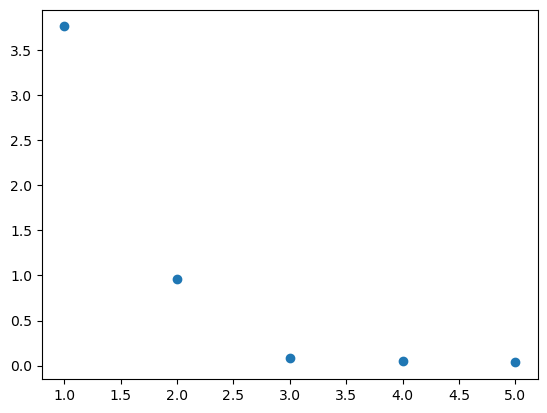

In [52]:
x = np.linspace(0,1,1000)
s = [np.zeros_like(x)]
e=[]
for n,l in enumerate(lambdas):
    y = quad(eig_fun_mul_2,0,1,args=(default_pars, l, b_star[n]),complex_func=True)[0]
    s.append(s[n] + y * eig_fun_1(x,default_pars, l, b_star[n]))
    err = sum((abs(s[n]) - 6)**2)/1000
    print(f'e_{n} = {err}')
    e.append(err)
    # if np.mod(n,2) == 0 and n > 0:
    # if n > 0 and n < 8:
    #     plt.plot(x, e, label=n)

plt.scatter(range(1,6), e[1:6])    
# plt.legend()
plt.show()


In [32]:
e

[-3.6,
 1.1800639039657943,
 0.5779438089610013,
 0.048207624963506286,
 0.03690246620583718,
 0.02552845705737861,
 0.020233164595527264,
 0.0149904226418956,
 0.024228918671425667,
 0.03287132136683207,
 -0.014454703535511705,
 -0.064114987126321]

# (To-do:)

$$z_1 = cos(k \pi x)$$

$$\qquad z_2 = \frac{1}{R} + \left(cos\left(k\pi\right)-\frac{1}{R}\right) \zeta$$
